In [2]:
# Load the uploaded CSV file
import pandas as pd

# Load the data, specifying the encoding
file_path = '/content/customer_booking.csv'
df = pd.read_csv(file_path, encoding='latin-1') # Try 'latin-1' or 'iso-8859-1'

# Display the first few rows of the dataframe
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
# Generate a report of missing values in the dataset
missing_values_report = df.isnull().sum().sort_values(ascending=False)
missing_values_report = missing_values_report[missing_values_report > 0]

missing_values_report


Series([], dtype: int64)

<ipython-input-4-d8a57ac16e45>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['flight_day_of_week'] = pd.to_datetime(df['flight_day'], errors='coerce').dt.day_name()


Accuracy: 0.8563
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.57      0.12      0.20      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.56     10000
weighted avg       0.82      0.86      0.81     10000



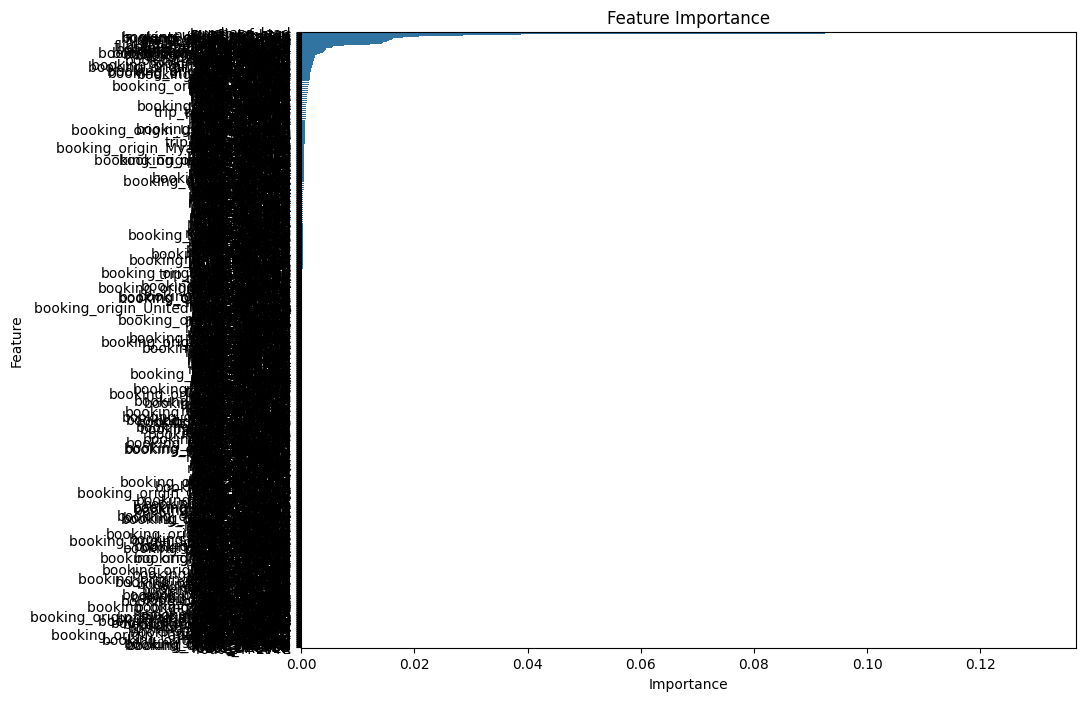

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/customer_booking.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Feature Engineering (create new features as necessary)
df['flight_day_of_week'] = pd.to_datetime(df['flight_day'], errors='coerce').dt.day_name()
df['flight_hour_bin'] = pd.cut(df['flight_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'flight_day_of_week', 'flight_hour_bin'])

# Define the target and features
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [10]:
import pandas as pd

# Load the data
file_path = '/content/customer_booking.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the columns and the first few rows of the dataframe
print("Columns in the dataset:\n", df.columns)
print("\nFirst few rows of the dataset:\n", df.head())


Columns in the dataset:
 Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

First few rows of the dataset:
    num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDE

In [11]:
# Generate a report of missing values
missing_values_report = df.isnull().sum().sort_values(ascending=False)
missing_values_report = missing_values_report[missing_values_report > 0]

print("Missing Values Report:\n", missing_values_report)


Missing Values Report:
 Series([], dtype: int64)


In [13]:
import pandas as pd

# Create a new feature for the day of the week from the flight_day column
df['flight_day_of_week'] = pd.to_datetime(df['flight_day'], format='%a', errors='coerce').dt.day_name()

# Create a new feature for binned flight hours
df['flight_hour_bin'] = pd.cut(df['flight_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'flight_day_of_week', 'flight_hour_bin'])

# Define the target and features
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



In [15]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
                      Feature  Importance
1              purchase_lead    0.131937
2             length_of_stay    0.102740
3                flight_hour    0.093024
0             num_passengers    0.044180
7            flight_duration    0.039342
..                       ...         ...
900  booking_origin_Slovakia    0.000000
592             route_KOSSYD    0.000000
605             route_KTMTWU    0.000000
486             route_JEDPDG    0.000000
279             route_DELKBR    0.000000

[928 rows x 2 columns]


In [16]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize and train the RandomForestClassifier
clf_res = RandomForestClassifier(n_estimators=100, random_state=42)
clf_res.fit(X_train_res, y_train_res)

# Make predictions
y_pred_res = clf_res.predict(X_test_res)

# Evaluate the model
accuracy_res = accuracy_score(y_test_res, y_pred_res)
report_res = classification_report(y_test_res, y_pred_res)
roc_auc_res = roc_auc_score(y_test_res, clf_res.predict_proba(X_test_res)[:, 1])

print("Accuracy (Resampled):", accuracy_res)
print("Classification Report (Resampled):\n", report_res)
print("ROC AUC Score (Resampled):", roc_auc_res)


Accuracy (Resampled): 0.9199247457228527
Classification Report (Resampled):
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8444
           1       0.96      0.88      0.92      8565

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009

ROC AUC Score (Resampled): 0.9749066201198349


In [19]:
importances_res = clf_res.feature_importances_
feature_importances_res = pd.DataFrame({'Feature': feature_names, 'Importance': importances_res}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Resampled):\n", feature_importances_res)


Feature Importances (Resampled):
                              Feature  Importance
870          booking_origin_Malaysia    0.092528
1                      purchase_lead    0.067305
7                    flight_duration    0.063882
2                     length_of_stay    0.059189
3                        flight_hour    0.048585
..                               ...         ...
66                      route_BKIMRU    0.000000
827           booking_origin_Belarus    0.000000
671                     route_MLEOOL    0.000000
887  booking_origin_Papua New Guinea    0.000000
821           booking_origin_Algeria    0.000000

[928 rows x 2 columns]


<ipython-input-20-07f251493d3b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


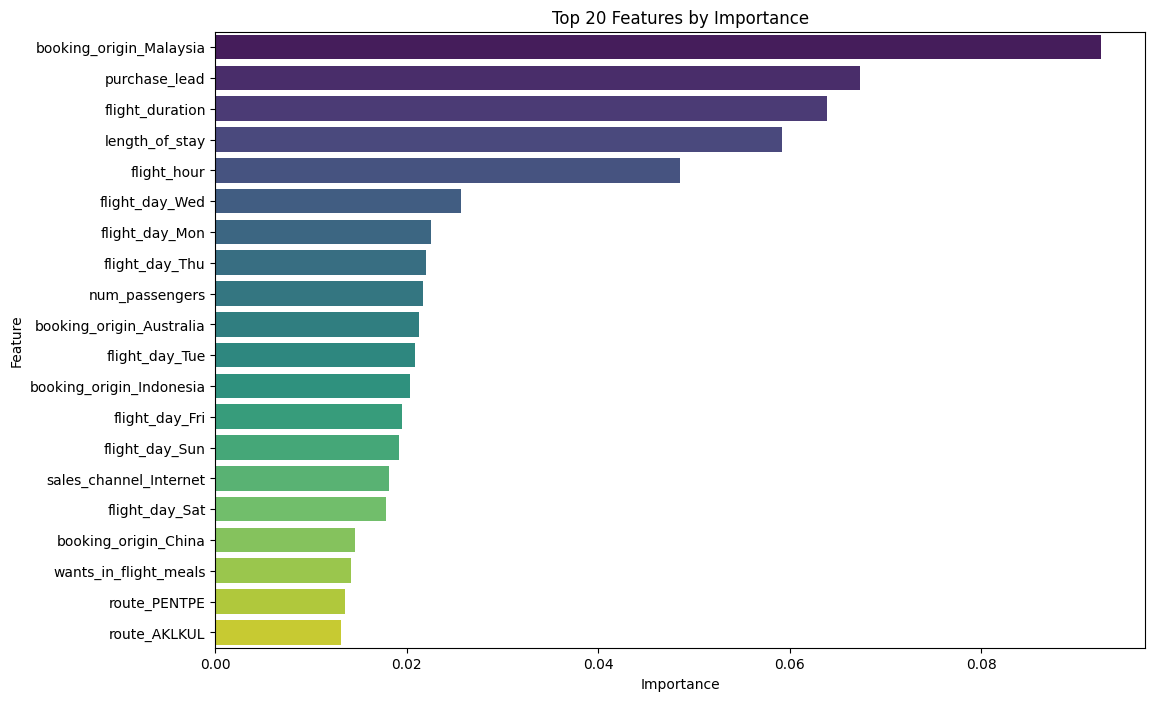

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have 'feature_importances_res' DataFrame with 'Feature' and 'Importance' columns sorted
top_20_features = feature_importances_res.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


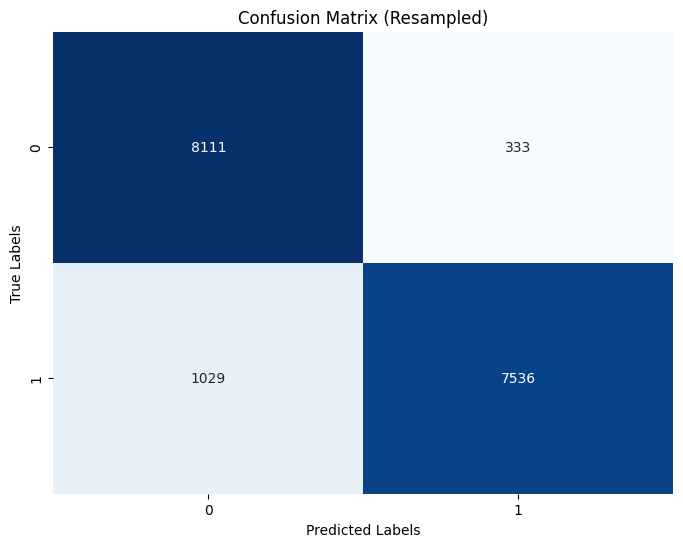

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test_res, y_pred_res)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Resampled)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


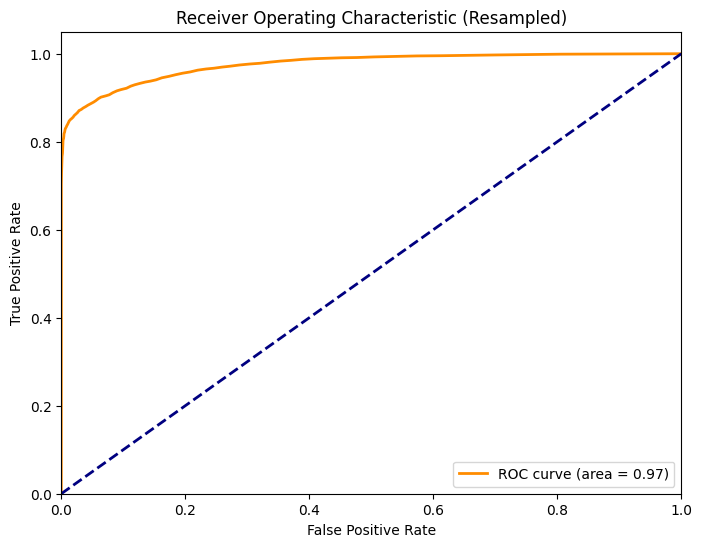

In [22]:
from sklearn.metrics import roc_curve

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_res, clf_res.predict_proba(X_test_res)[:, 1])
roc_auc = roc_auc_score(y_test_res, clf_res.predict_proba(X_test_res)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Resampled)')
plt.legend(loc="lower right")
plt.show()


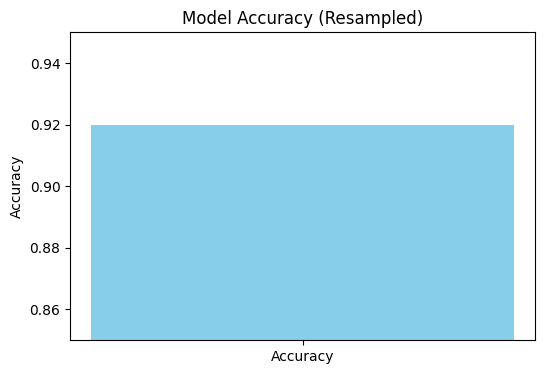

In [23]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy_res], color='skyblue')
plt.title('Model Accuracy (Resampled)')
plt.ylim([0.85, 0.95])  # Adjust ylim based on your specific accuracy values
plt.ylabel('Accuracy')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (3,).

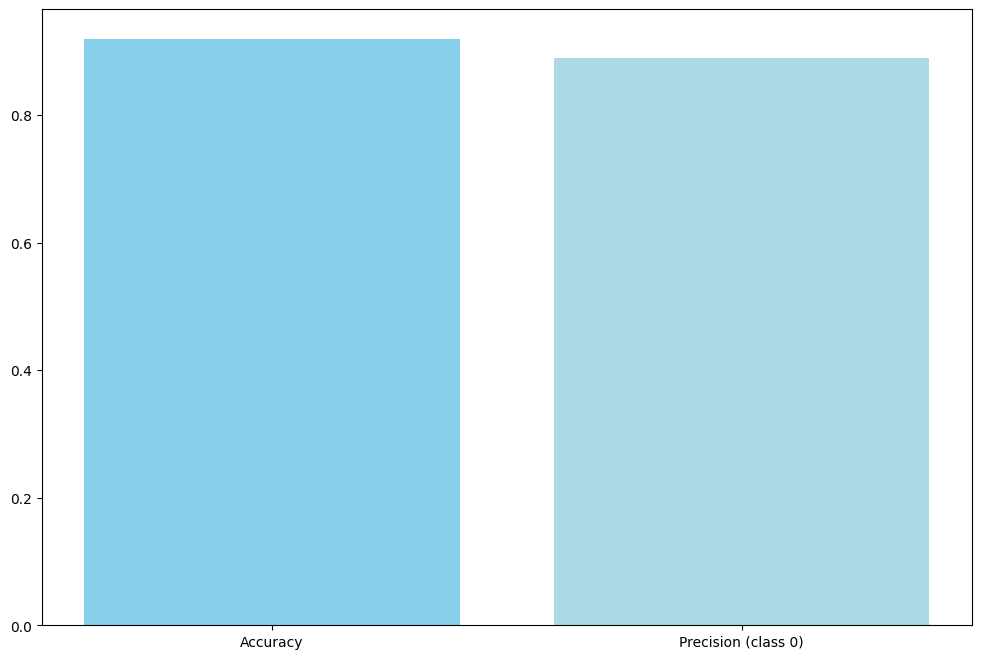

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their values
metrics = ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)',
           'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)', 'ROC AUC Score']
values = [accuracy_res,
          float(report_res.split('\n')[2].split()[1]),
          float(report_res.split('\n')[2].split()[2]),
          float(report_res.split('\n')[2].split()[3]),
          float(report_res.split('\n')[3].split()[1]),
          float(report_res.split('\n')[3].split()[2]),
          float(report_res.split('\n')[3].split()[3]),
          roc_auc_res]

# Plotting all metrics in one frame
plt.figure(figsize=(12, 8))

# Bar plot for accuracy and ROC AUC score
plt.bar(metrics[:2], values[:2], color=['skyblue', 'lightblue'])

# Bar plot for precision, recall, and f1-score for each class
x = np.arange(6)
width = 0.2

plt.bar(x - width, values[2:5], width, label='Class 0', color='lightgreen')
plt.bar(x + width, values[5:8], width, label='Class 1', color='lightcoral')

# Adding labels and title
plt.ylabel('Score')
plt.title('Model Evaluation Metrics (Resampled)')
plt.ylim([0.85, 1.0])  # Adjust ylim based on your specific metric values
plt.legend()

# Display the plot
plt.show()
